## Data analysis --GoDaddy

In [1]:
from constants import *
import pandas as pd

F:\Projets\Competitions\Kaggle\GoDaddy - MicroBusiness Forecasting\GoDaddy\constants.py:9: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:77.)
  DEVICE = torch.device("cuda" if use_cuda else "cpu")


In [2]:
import pandas as pd

In [3]:
df_census= pd.read_csv(os.path.join(DATA_DIR, 'census_starter.csv'))
df_census.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [54]:
df_train= pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
df_train['year']=pd.to_datetime(df_train['first_day_of_month'].str.split("-", expand=True)[0])
df_train.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019-01-01
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019-01-01
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,2019-01-01
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,2019-01-01
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,2019-01-01


## Computing correlation between the features

In [5]:
#Considering features of 2018
columns = [d for d in df_census.columns if '2018' in d] + ['']
df_censur_2018 = df_census[columns]

<AxesSubplot: >

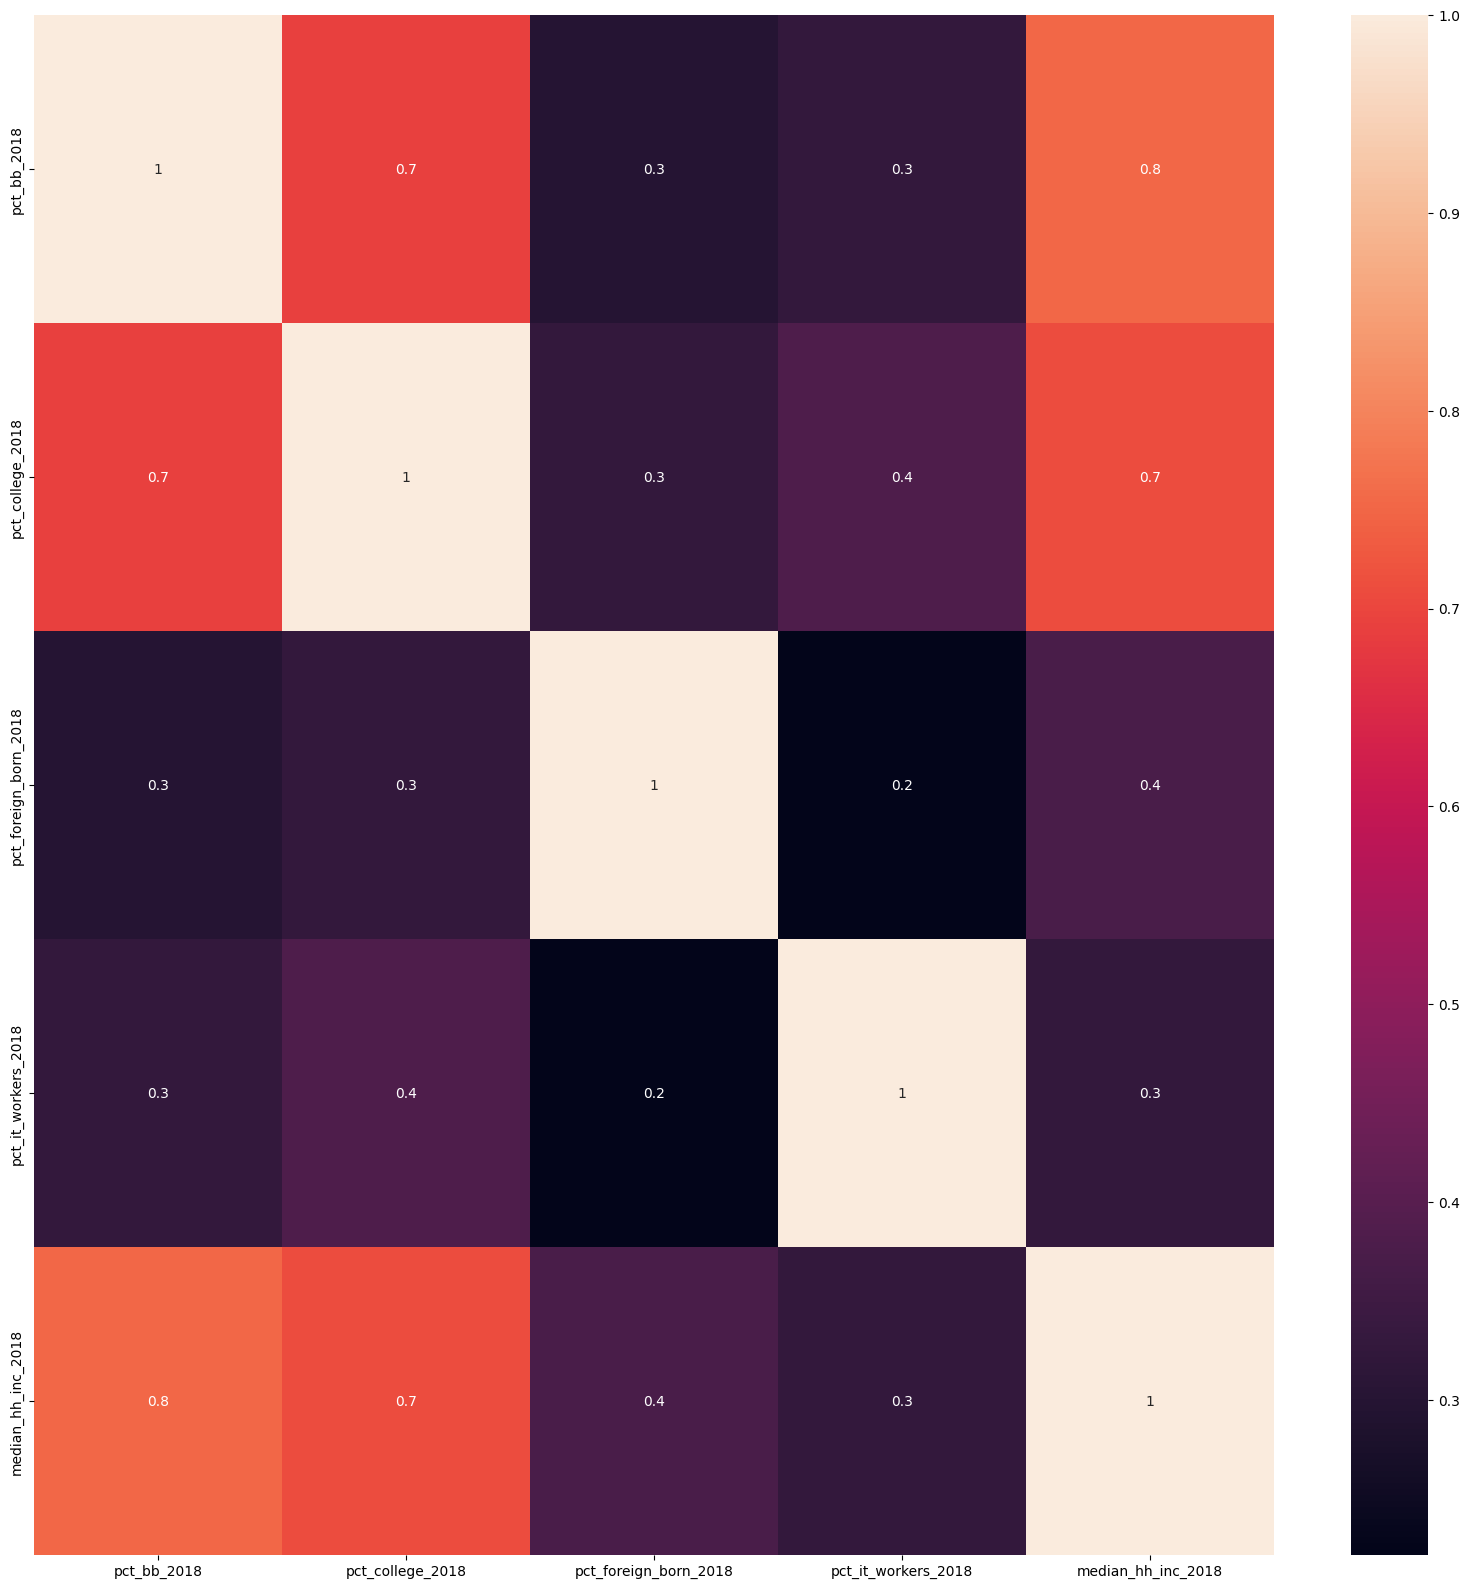

In [8]:
#Visualizing the correlation between the features
import seaborn as sns
import matplotlib.pyplot as plt
corr = df_censur_2018.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.1g')

In [43]:
years= [2017,2018,2019,2020,2021]
attributes= ['pct_bb','pct_college', 'pct_foreign_born','pct_it_workers','median_hh_inc']
##Adding the attributes to the dataframe df_train, for month take the value of the corresponding year and cfips
col_map = {}
col_map["year"] = []
for year in years:
    col_map["year"] += [year] * df_census.shape[0]
for attribute in attributes:
    col_map[attribute] = []
    for year in years:
        col_map[attribute] += list(df_census[attribute+ '_' + str(year)])
col_map["cfips"] = list(df_census["cfips"]) * len(years)
df_census_reshaped =   pd.DataFrame(col_map)
df_census_reshaped['year']= pd.to_datetime(df_census_reshaped['year'], format='%Y')
df_census_reshaped

,year,pct_bb,pct_college,pct_foreign_born,pct_it_workers,median_hh_inc,cfips
0,2017-01-01,76.6,14.5,2.1,1.3,55317.0,1001
1,2017-01-01,74.5,20.4,3.2,1.4,52562.0,1003
2,2017-01-01,57.2,7.6,2.7,0.5,33368.0,1005
3,2017-01-01,62.0,8.1,1.0,1.2,43404.0,1007
4,2017-01-01,65.8,8.7,4.5,1.3,47412.0,1009
...,...,...,...,...,...,...,...
15705,2021-01-01,88.4,12.4,5.5,1.0,76668.0,56037
15706,2021-01-01,90.5,38.3,11.1,2.0,94498.0,56039
15707,2021-01-01,90.6,12.3,2.9,0.9,75106.0,56041
15708,2021-01-01,85.4,17.2,1.0,1.1,62271.0,56043


In [56]:
df_trained_reshaped = pd.merge(df_train, df_census_reshaped, how='left', left_on=['year','cfips'], right_on=['year','cfips'])

In [57]:
df_trained_reshaped

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,pct_bb,pct_college,pct_foreign_born,pct_it_workers,median_hh_inc
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019-01-01,80.6,16.1,2.3,0.7,58731.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019-01-01,80.6,16.1,2.3,0.7,58731.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,2019-01-01,80.6,16.1,2.3,0.7,58731.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,2019-01-01,80.6,16.1,2.3,0.7,58731.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,2019-01-01,80.6,16.1,2.3,0.7,58731.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101,2022-01-01,NaN,NaN,NaN,NaN,NaN
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101,2022-01-01,NaN,NaN,NaN,NaN,NaN
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100,2022-01-01,NaN,NaN,NaN,NaN,NaN
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100,2022-01-01,NaN,NaN,NaN,NaN,NaN


In [58]:
df_trained_reshaped.to_csv(os.path.join(DATA_DIR, 'train_with_census.csv'), index=False)